In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Model Training

In [2]:
df = pd.read_csv('./data/loan_approval_train.csv')
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [3]:
# df=df.drop(labels=['id'],axis=1)
# df.info()
# df.isnull().sum() --0
# df[df.duplicated() ==True] --0
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [4]:
## Independent and dependent features
X = df.drop(labels=['loan_status', 'id'],axis=1)
y_df = df[['loan_status']]

In [5]:
X

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3
...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10
58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8
58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2
58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3


In [6]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,58645.0,27.550857,6.033216,20.00,23.00,26.00,30.00,123.00
person_income,58645.0,64046.172871,37931.106978,4200.00,42000.00,58000.00,75600.00,1900000.00
person_emp_length,58645.0,4.701015,3.959784,0.00,2.00,4.00,7.00,123.00
loan_amnt,58645.0,9217.556518,5563.807384,500.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,58645.0,10.677874,3.034697,5.42,7.88,10.75,12.99,23.22
loan_percent_income,58645.0,0.159238,0.091692,0.00,0.09,0.14,0.21,0.83
cb_person_cred_hist_length,58645.0,5.813556,4.029196,2.00,3.00,4.00,8.00,30.00


In [7]:
# Segregating numerical and categorical variables
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [8]:
print(categorical_cols)

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')


In [9]:
# numerical_cols
# len(numerical_cols)
print(df['loan_status'].value_counts(normalize=True))

# y_df.value_counts()

loan_status
0    0.857618
1    0.142382
Name: proportion, dtype: float64


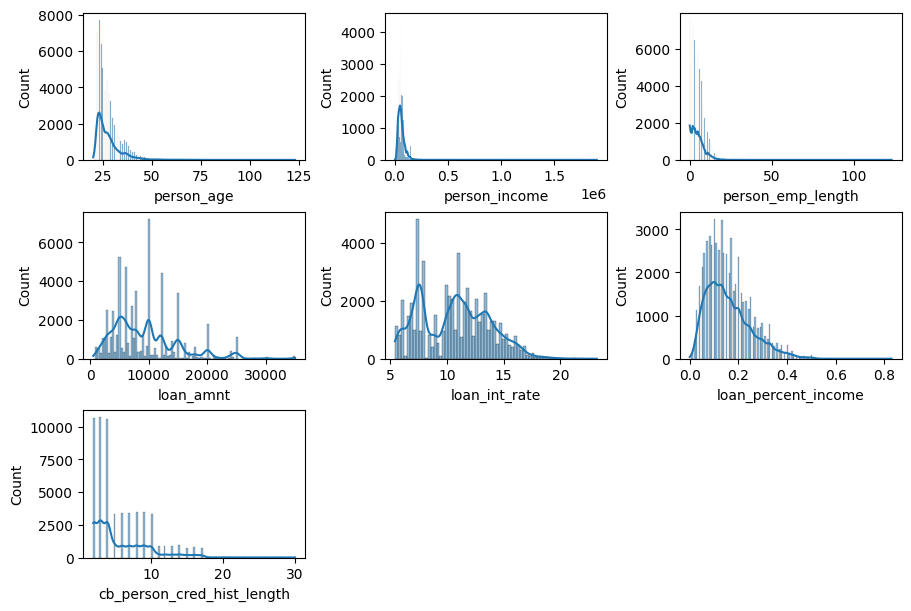

In [10]:
fig, axes = plt.subplots(3, 3 ,figsize=(9, 6), constrained_layout=True) 
for i, cols in enumerate(numerical_cols):
    x, y=divmod(i, 3)
    sns.histplot(df[cols], ax=axes[x, y], kde=True)
for ax in axes.flat[len(numerical_cols):]:
    # print(ax)
    ax.remove()
plt.show()

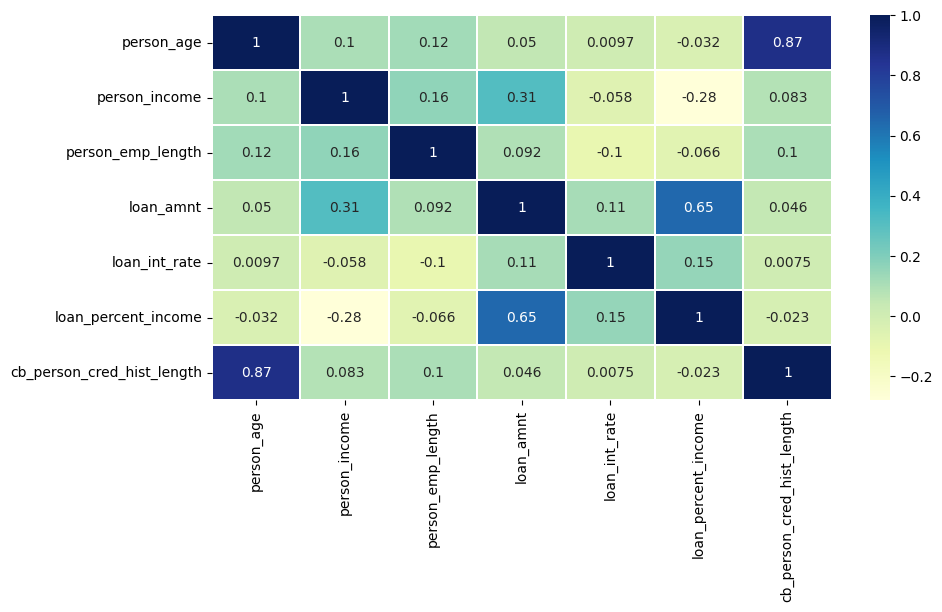

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(df[numerical_cols].corr(),annot=True,linewidths=0.2, cmap='YlGnBu')
plt.show()

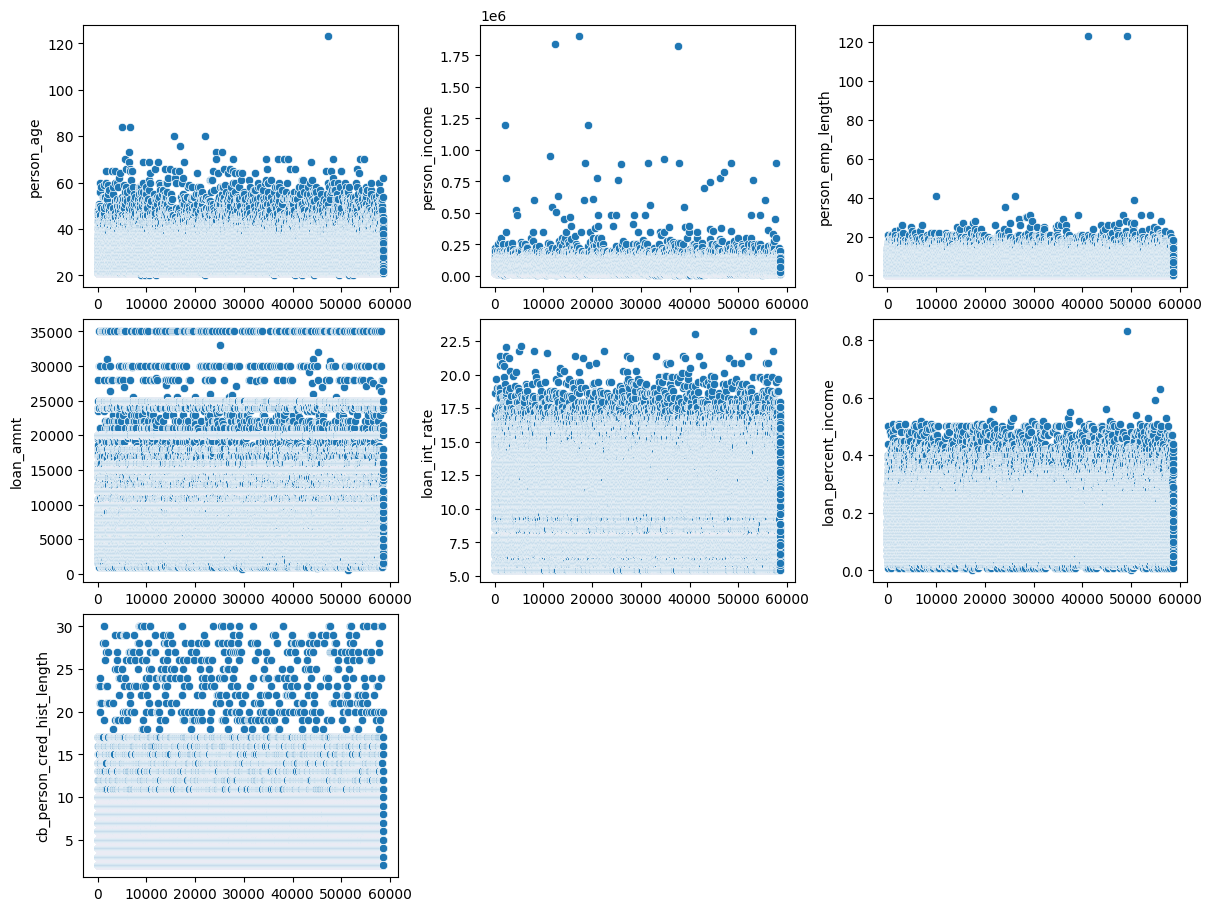

In [12]:
fig, axes = plt.subplots(3, 3 ,figsize=(12, 9), constrained_layout=True) 

for i, cols in enumerate(numerical_cols):
    x, y=divmod(i, 3)
    sns.scatterplot(df[cols], ax=axes[x, y])

for ax in axes.flat[len(numerical_cols):]:
    # print(ax)
    ax.remove()

plt.show()

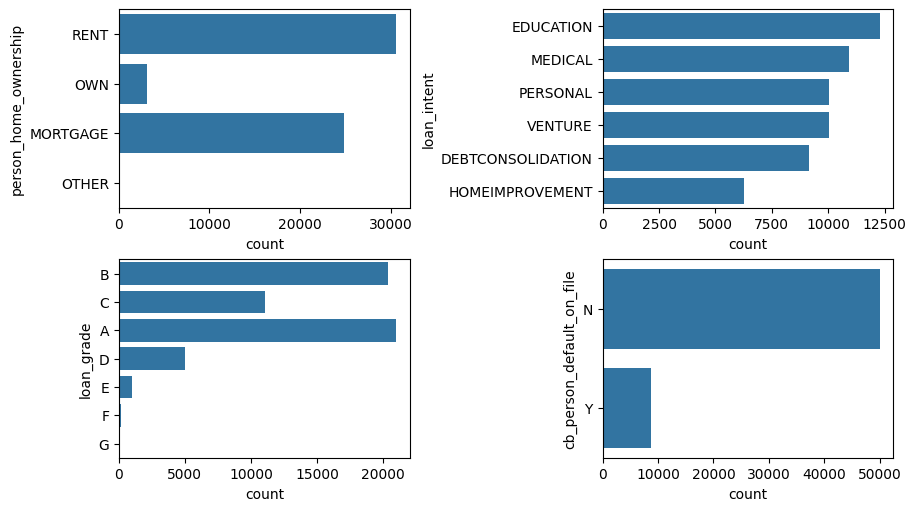

In [13]:
fig, axes = plt.subplots(2, 2 ,figsize=(9,5), constrained_layout=True) 
for i, cols in enumerate(df.select_dtypes(include='object')):
    a, b=divmod(i, 2)
    sns.countplot(df[cols], ax=axes[a, b])
plt.show()

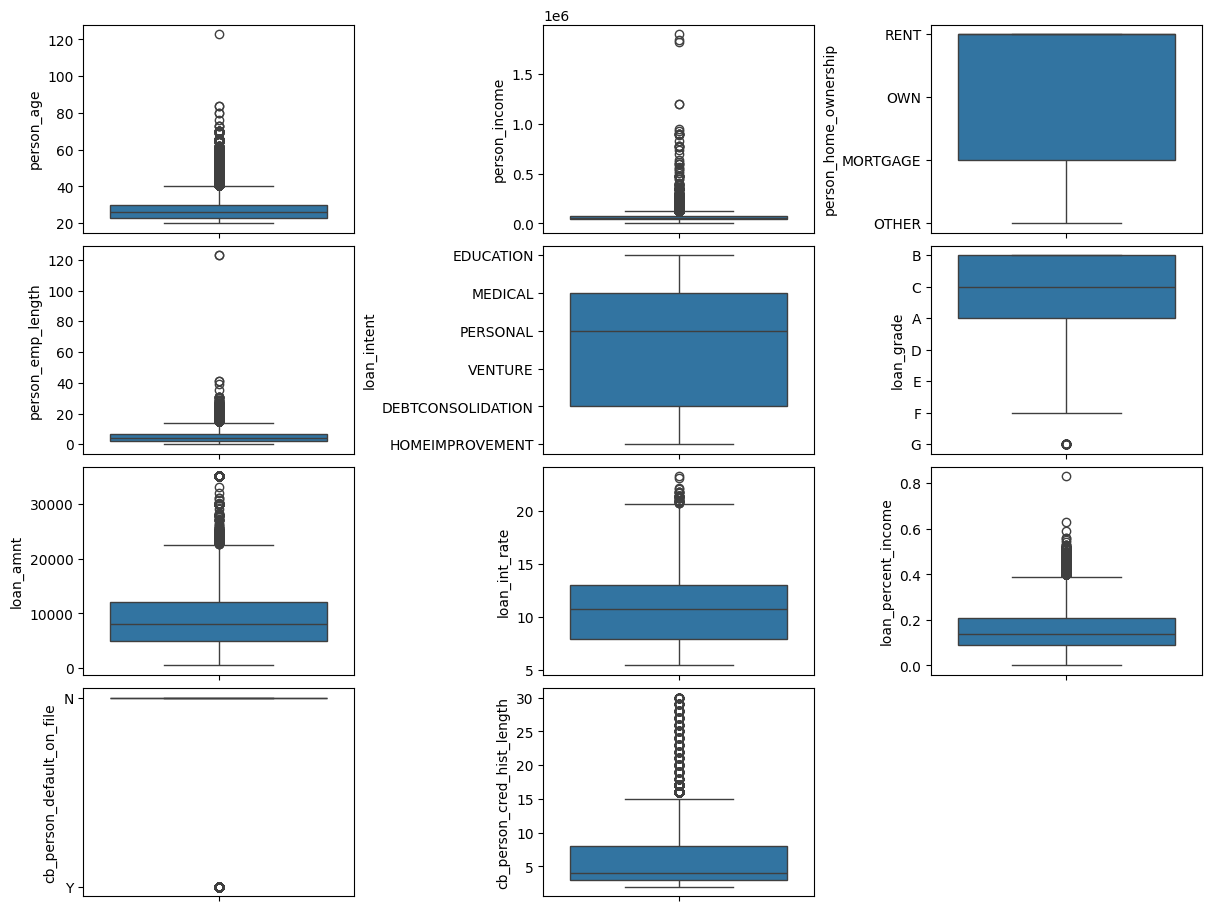

In [14]:
fig, axes = plt.subplots(4, 3 ,figsize=(12, 9), constrained_layout=True) 

for i, cols in enumerate(X.columns):
    a, b=divmod(i, 3)
    # print(x, y, i, cols)
    sns.boxplot(X[cols], ax=axes[a, b])
for ax in axes.flat[len(X.columns):]:
    # print(ax)
    ax.remove()
plt.show()

In [15]:
X.describe().T


,count,mean,std,min,25%,50%,75%,max
person_age,58645.0,27.550857,6.033216,20.00,23.00,26.00,30.00,123.00
person_income,58645.0,64046.172871,37931.106978,4200.00,42000.00,58000.00,75600.00,1900000.00
person_emp_length,58645.0,4.701015,3.959784,0.00,2.00,4.00,7.00,123.00
loan_amnt,58645.0,9217.556518,5563.807384,500.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,58645.0,10.677874,3.034697,5.42,7.88,10.75,12.99,23.22
loan_percent_income,58645.0,0.159238,0.091692,0.00,0.09,0.14,0.21,0.83
cb_person_cred_hist_length,58645.0,5.813556,4.029196,2.00,3.00,4.00,8.00,30.00


In [16]:
# X.person_age.value_counts().sort_values().sort_index()
((X['person_age']>60)==True).value_counts()

person_age
False    58566
True        79
Name: count, dtype: int64

In [17]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [18]:
preprocessor=ColumnTransformer(
    transformers=[
        ('numerical', StandardScaler(), numerical_cols),
        ('categorical', OneHotEncoder(), categorical_cols)
    ])

X_scaled=preprocessor.fit_transform(X)

In [19]:
type(X_scaled)

numpy.ndarray

In [20]:
from sklearn.model_selection import train_test_split
# Y_values_cat = pd.qcut(y,[0,1],labels = ["1st","2nd"])


In [21]:
X_train,  X_test, y_train, y_test=train_test_split(X_scaled, y_df, test_size=0.3, random_state=42)

In [22]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((41051, 26), (41051, 1), (17594, 26), (17594, 1))

In [23]:
y_train.value_counts()

loan_status
0              35169
1               5882
Name: count, dtype: int64

In [46]:
# !pip list
# !pip install xgboost

In [43]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, IsolationForest, HistGradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

In [26]:
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [27]:
LRclassifier=LogisticRegression()
LRclassifier.fit(X_train, y_train)

LogisticRegression()

# Logistic Regression

In [28]:
y_pred_test = LRclassifier.predict(X_test)

In [29]:
accuracy_score(y_test, y_pred_test)

0.9120722973741048

In [30]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     15126
           1       0.77      0.53      0.63      2468

    accuracy                           0.91     17594
   macro avg       0.85      0.75      0.79     17594
weighted avg       0.91      0.91      0.91     17594



In [31]:
# y_pred_train = LRclassifier.predict(X_train)

In [32]:
accuracy_score(y_train, y_pred_train)

0.9123529268470927

# LogisticRegressionCV

In [44]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree' : DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(max_depth=2, random_state=42),
    'SVM': SVC(random_state=42),
    'ADABoost':AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

In [45]:
from sklearn.metrics import confusion_matrix
import plotly.express as px
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_test=model.predict(X_test)
    print(name,classification_report(y_test, y_pred_test))
    
    # cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_)
    # fig = px.imshow(cm, text_auto=True, aspect='auto', color_continuous_scale='Blues')
    # # disp.plot(cmap='GnBu')
    # fig.show()

    # plt.figure(figsize=(8, 6))
    # sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=df.loan_status, yticklabels=df.loan_status)

    # # Add labels, title, and axes ticks
    # plt.title("Confusion Matrix")
    # plt.xlabel("Predicted Label")
    # plt.ylabel("True Label")
    # plt.show()

Logistic Regression               precision    recall  f1-score   support

           0       0.93      0.97      0.95     15126
           1       0.77      0.53      0.63      2468

    accuracy                           0.91     17594
   macro avg       0.85      0.75      0.79     17594
weighted avg       0.91      0.91      0.91     17594

Decision Tree               precision    recall  f1-score   support

           0       0.95      0.94      0.95     15126
           1       0.67      0.72      0.69      2468

    accuracy                           0.91     17594
   macro avg       0.81      0.83      0.82     17594
weighted avg       0.91      0.91      0.91     17594

Random Forest               precision    recall  f1-score   support

           0       0.87      1.00      0.93     15126
           1       1.00      0.09      0.17      2468

    accuracy                           0.87     17594
   macro avg       0.93      0.55      0.55     17594
weighted avg       0.89   

In [56]:
# pip install catboost
# categorical_cols
numerical_cols

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')

In [61]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=100,
    random_seed=42,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy'])
model.fit(X_train, y_train,
    # cat_features=categorical_cols,
    #  text_features=numerical_cols,     
    # eval_set=(X_test, y_test),
    verbose=False,
    plot=True)

# Evaluate and predict

predictions = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(accuracy)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0.9523132886211209
